In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

## Step 1: Filtering

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


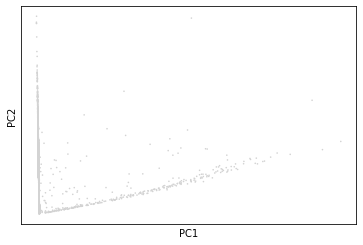

In [3]:
pca_adata = sc.tl.pca(adata, copy = True)
sc.pl.pca(pca_adata)

In [4]:
adata_filter = sc.pp.recipe_zheng17(adata, n_top_genes=1000, log=True, copy=True)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


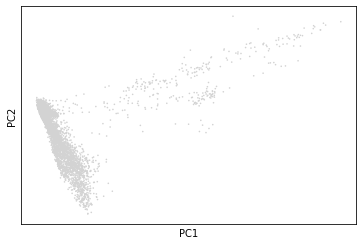

In [5]:
pca_adata_filter = sc.tl.pca(adata_filter, copy = True)
sc.pl.pca(pca_adata_filter)

## Step Two: Clustering

In [6]:
adata_neighbor = sc.pp.neighbors(adata_filter, copy = True)
adata_clustered = sc.tl.leiden(adata_neighbor, copy = True)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


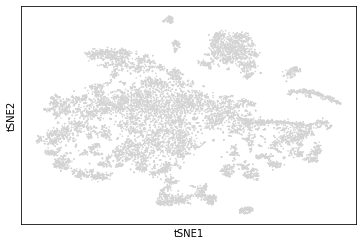

In [7]:
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['leiden'])

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


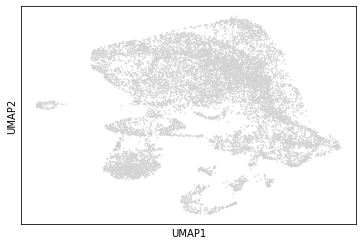

In [8]:
umap_adata = sc.tl.umap(adata_clustered, copy = True)
sc.pl.umap(umap_adata, color = ['leiden'])

## Step Three: Distinguishing genes

In [9]:
adata_rank_ttest = sc.tl.rank_genes_groups(adata_clustered, groupby = 'leiden', method = 't-test', copy = True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


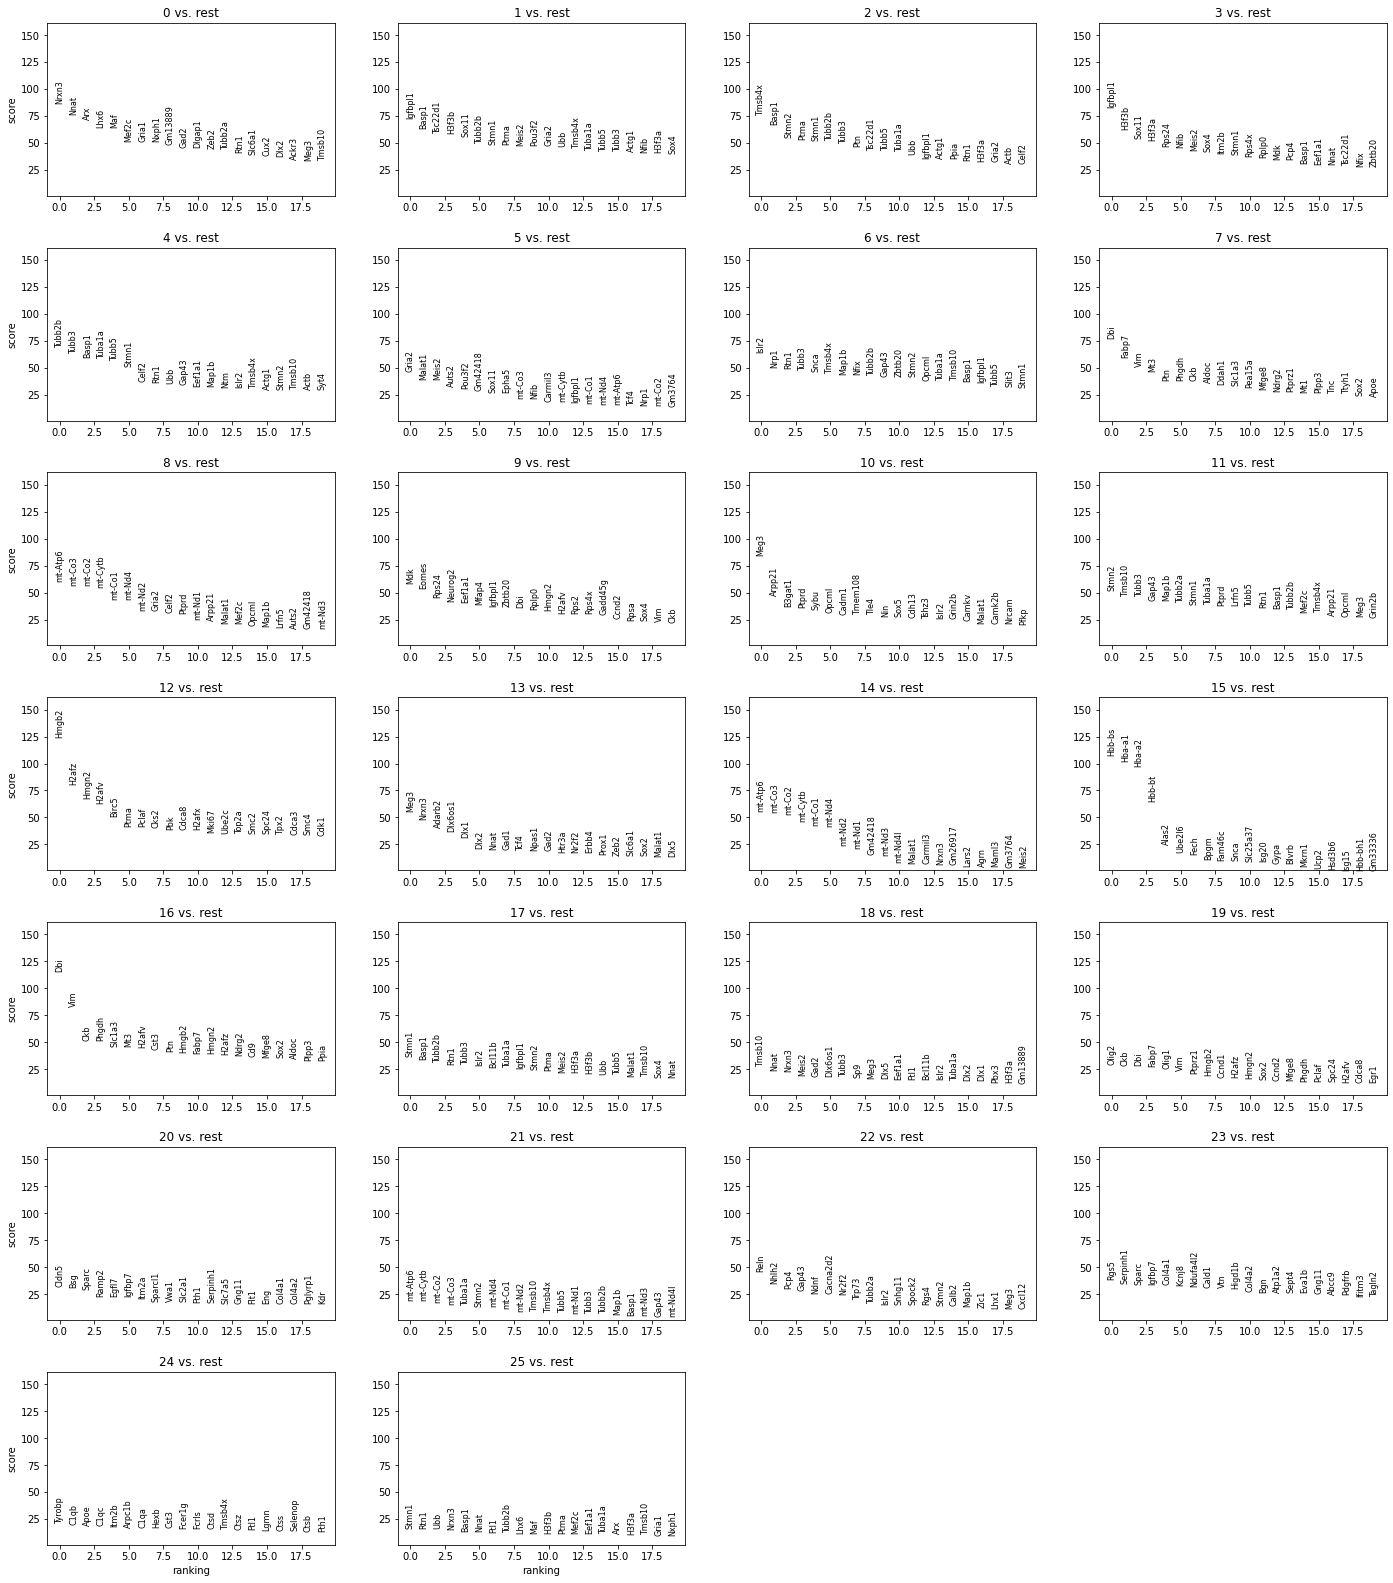

In [10]:
sc.pl.rank_genes_groups(adata_rank_ttest)

In [11]:
adata_rank_logreg = sc.tl.rank_genes_groups(adata_rank_ttest, groupby = 'leiden', method = 'logreg', copy = True)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


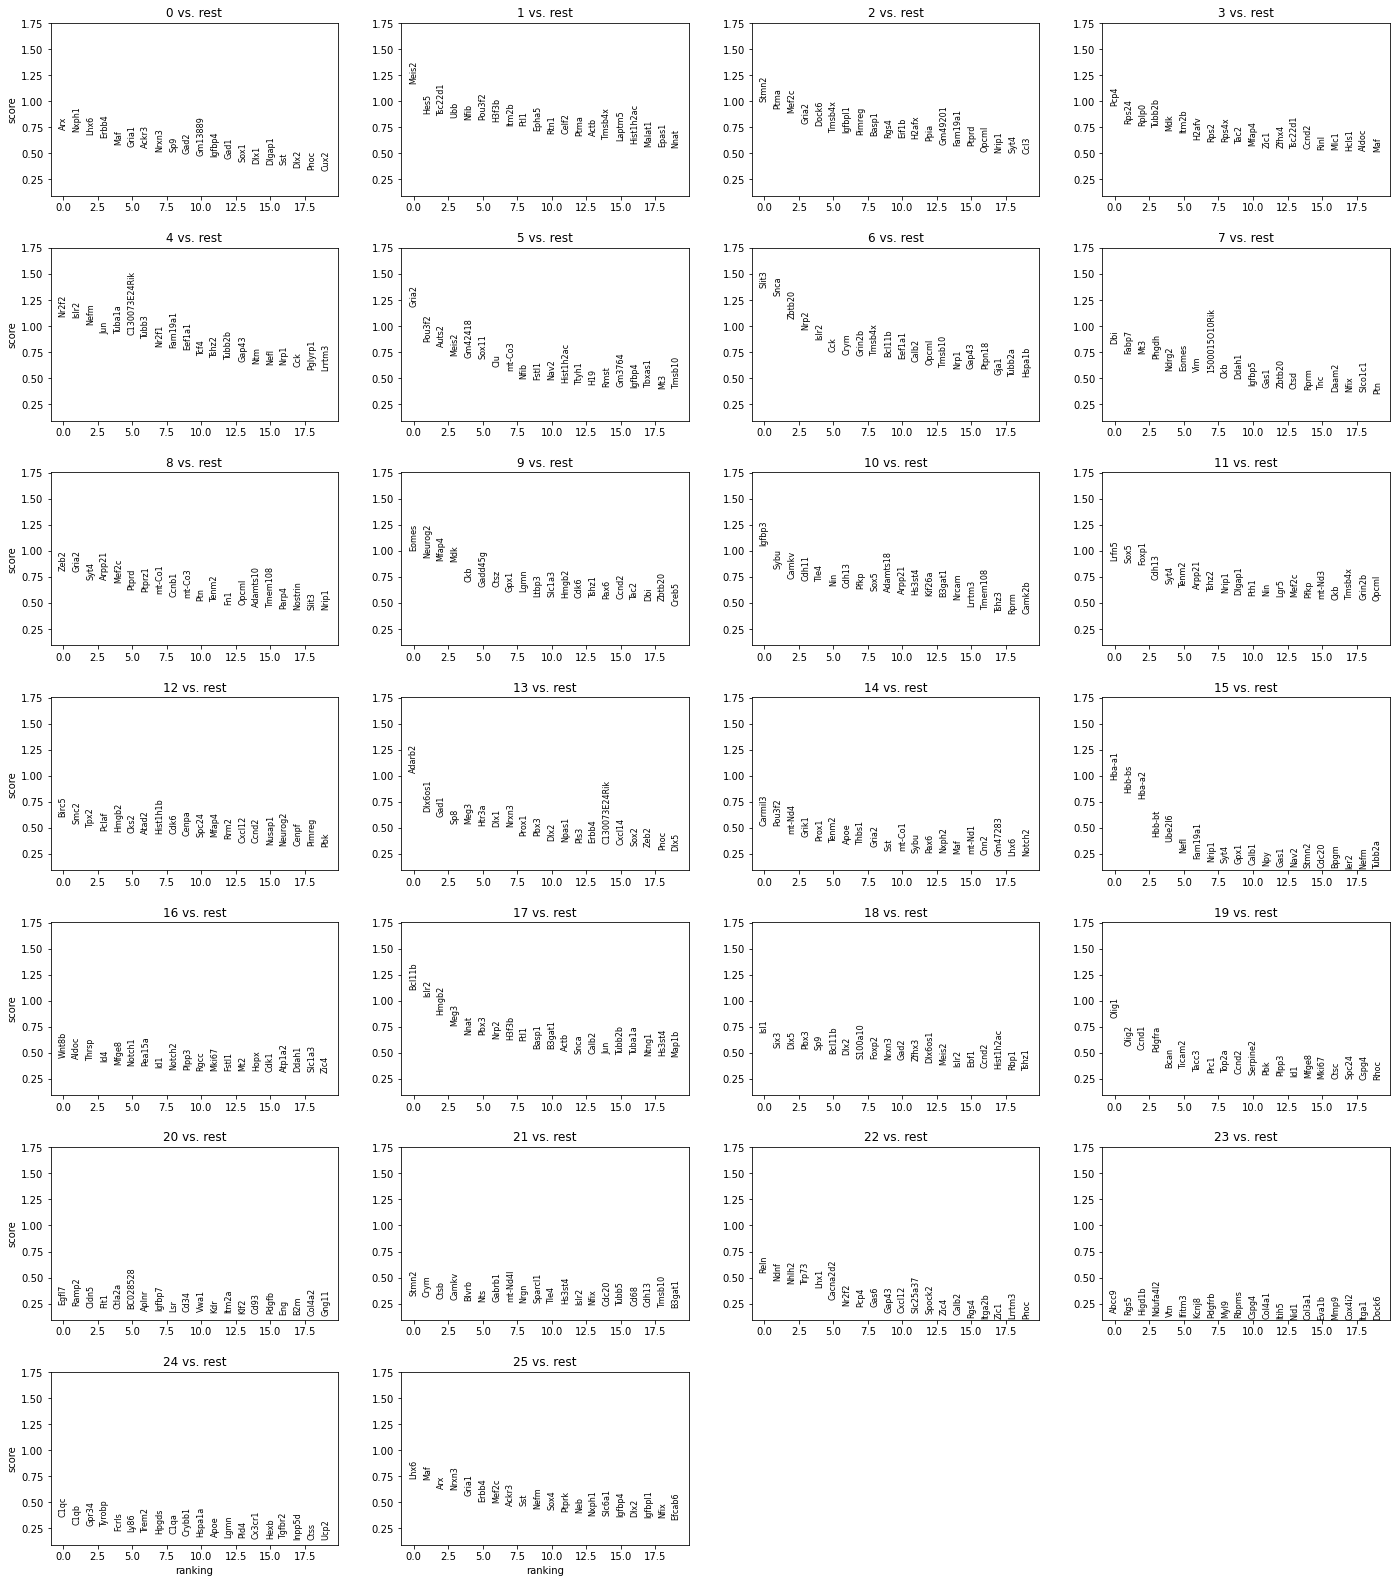

In [12]:
sc.pl.rank_genes_groups(adata_rank_logreg)

In [72]:
genes_clustered = pd.DataFrame()
for i in range(0,26):
    group = sc.get.rank_genes_groups_df(adata_rank_ttest, group = str(i))
    genes_clustered[i] = group['names'][0:100]
genes_clustered

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Nrxn3,Igfbpl1,Tmsb4x,Igfbpl1,Tubb2b,Gria2,Islr2,Dbi,mt-Atp6,Mdk,...,Dbi,Stmn1,Tmsb10,Olig2,Cldn5,mt-Atp6,Reln,Rgs5,Tyrobp,Stmn1
1,Nnat,Basp1,Basp1,H3f3b,Tubb3,Malat1,Nrp1,Fabp7,mt-Co3,Eomes,...,Vim,Basp1,Nnat,Ckb,Bsg,mt-Cytb,Nhlh2,Serpinh1,C1qb,Rtn1
2,Arx,Tsc22d1,Stmn2,Sox11,Basp1,Meis2,Rtn1,Vim,mt-Co2,Rps24,...,Ckb,Tubb2b,Nrxn3,Dbi,Sparc,mt-Co2,Pcp4,Sparc,Apoe,Ubb
3,Lhx6,H3f3b,Ptma,H3f3a,Tuba1a,Auts2,Tubb3,Mt3,mt-Cytb,Neurog2,...,Phgdh,Rtn1,Meis2,Fabp7,Ramp2,mt-Co3,Gap43,Igfbp7,C1qc,Nrxn3
4,Maf,Sox11,Stmn1,Rps24,Tubb5,Pou3f2,Snca,Ptn,mt-Co1,Eef1a1,...,Slc1a3,Tubb3,Gad2,Olig1,Egfl7,Tuba1a,Ndnf,Col4a1,Itm2b,Basp1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Basp1,Cftr,Gm16222,mt-Nd3,Lsr,Gm48767,Adcy1,Id1,Gm29797,mt-Co2,...,Rplp0,Inpp5d,Pcdh11x,Pcdh11x,Apold1,Gm11175,Apod,Adora2a,Stab1,Cck
96,Hist1h1c,2410021H03Rik,Gm44739,Nrp2,BC018473,Gm26637,Lgmn,Ccnd1,2310031A07Rik,Pcp4,...,Rps4x,Syt4,Oprk1,Rbp1,Nostrin,Col4a1,Stx11,Itm2a,Egr1,Tmem108
97,Hist1h2ac,Duoxa1,Grb7,Ghdc,4933408J17Rik,Stfa1,Nfkbia,Gm3764,Gm28042,Nfkbia,...,Fgfr3,mt-Co2,Cxcl14,Serpinh1,Adora2a,Hp,Itm2a,Bsg,Jun,Phlda1
98,Fth1,Gm29123,Camkv,mt-Co2,Cpne6,Lbx2,Gja1,Arx,Mzb1,Bcan,...,Lrp4,Ackr3,Serpine2,Mt3,Sept4,Klf2,Lars2,Fos,Srgn,Itm2b


In [20]:
def findindf(df, query, ncol = None):
    if ncol != None: 
        col = df.iloc[:, ncol]
        if query in list(col.values):
            col_list = ncol
        else: 
            col_list = None
    elif ncol == None: 
        col_list = []
        for i in range(0, len(df.columns)):
            col = df.iloc[:,i]
            if query in list(col.values):
                col_list.append(i)
            continue
    else: 
        print('ncol is an integer value for the column to be searched')
    return col_list

glial cell type is in column [6]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


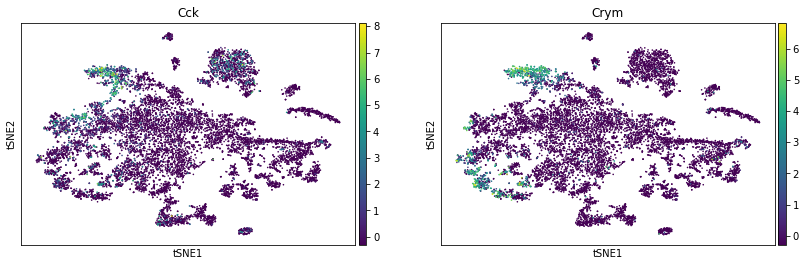

In [39]:
# Gene markers for Glial cells : CCK and CRYM - 1
col = findindf(genes_clustered, 'Cck', ncol = None)
col_glial = findindf(genes_clustered, 'Crym', ncol = col)
print('glial cell type is in column', col_glial)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Cck', 'Crym'])

Astrocytes cell type is in column [7]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


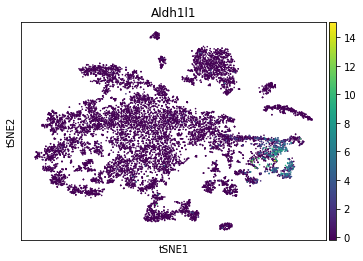

In [43]:
# Gene markers for Astrocytes : Aldh1l1 - 2
col_astro = findindf(genes_clustered, 'Aldh1l1', ncol = None)
print('Astrocytes cell type is in column', col_astro)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Aldh1l1'])

Oligodentrocytes are in column  [19]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


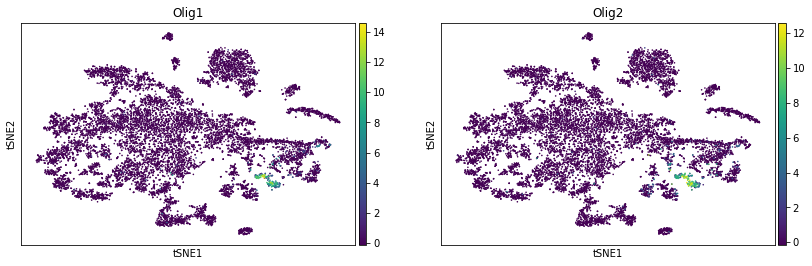

In [46]:
# Gene markers for oligodendrocytes : Olig1, Olig2 - 3
col_olig = findindf(genes_clustered, 'Olig1')
col_olig2 = findindf(genes_clustered, 'Olig2', ncol = col_olig)
print('Oligodentrocytes are in column ', col_olig2)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Olig1', 'Olig2'])

Radial glial cells are in column [1, 3, 5, 7, 9, 12, 14, 17, 18] [7, 16, 19] [7, 16, 19]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


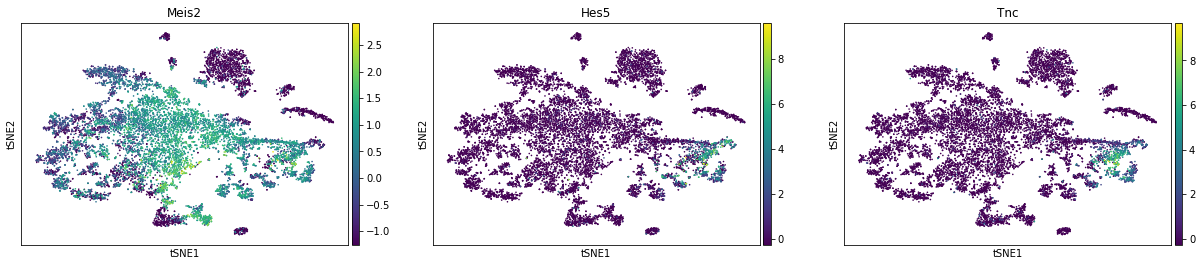

In [133]:
# Gene Markers for Radial Glial Cells : Meis2, Hes5 - 4
col_glial = findindf(genes_clustered, 'Meis2')
col_glial_2 = findindf(genes_clustered, 'Hes5')
col_glial_3 = findindf(genes_clustered, 'Tnc')
print('Radial glial cells are in column', col_glial, col_glial_2, col_glial_3)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Meis2', 'Hes5', 'Tnc'])

[10, 21] [8, 10, 11]
Bipolar cells are in column 10


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


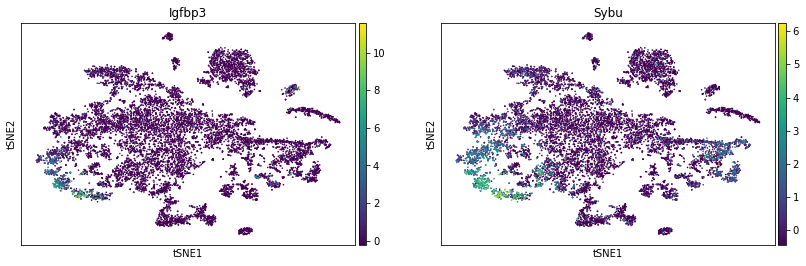

In [59]:
# Gene Markers for Biopolar cells : Igfbp3, Sybu - 5
col_bipolar = findindf(genes_clustered, 'Igfbp3')
col_bipolar_2 = findindf(genes_clustered, 'Sybu')
print(col_bipolar, col_bipolar_2)
print('Bipolar cells are in column', 10)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Igfbp3', 'Sybu'])

adult nscs in this column:  [7, 9, 12, 16, 19] [9]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


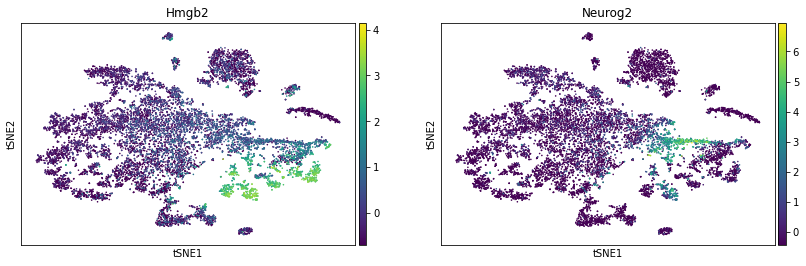

In [62]:
# Gene marker for adult neural stem cells : Hmgb2, Neurog 2 - 6
col_NSC = findindf(genes_clustered, 'Hmgb2')
col_NSC_2 = findindf(genes_clustered, 'Neurog2')
print('adult nscs in this column: ', 9)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Hmgb2', 'Neurog2'])

Glutamatergic in this column:  [0, 6, 14, 22, 25] [0, 13, 14, 22, 25]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


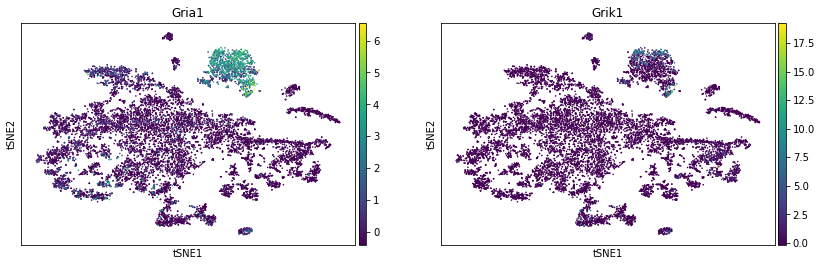

In [117]:
# Gene Markers for Glutamatergic neurons : Gria1, Grik1,  - 7
col_glut = findindf(genes_clustered, 'Gria1')
col_glut_2 = findindf(genes_clustered, 'Grik1')
print('Glutamatergic in this column: ', col_glut, col_glut_2)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Gria1', 'Grik1'])

Amacrine Cells:  [22]


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


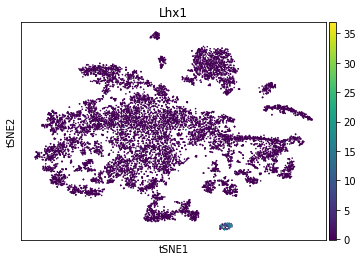

In [88]:
# Gene markers for Microglial Cells : Rtn1 - 8
col_mic = findindf(genes_clustered, 'Lhx1')
print('Microglial Cells: ', col_mic)
tsne_adata = sc.tl.tsne(adata_clustered, copy = True)
sc.pl.tsne(tsne_adata, color = ['Lhx1'])